# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №5 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 14 мая 2018, 18:00 <br\>
**Штраф за опоздание:** -3 балла после 06:00 17 мая, -6 балла после 06:00 24 мая, -9 баллов после 06:00 31 мая

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw5.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (5 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (3 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (5 балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (2 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [4]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
#import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline
%load_ext pycodestyle_magic

Populating the interactive namespace from numpy and matplotlib
The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1.	Авдюнина Полина
2.	Авилова Екатерина
3.	Акентьева Анна
4.	Акиньщиков Алексей
5.	Аладушкин Данил
6.	Алекберов  Ибрагим
7.	Анисимова Мария
8.	Анненков Сергей
9.	Баянов Виктор
10.	Болычев Антон
11.	Бучкин Александр
12.	Господинов Георгий
13.	Гультиков Никита
14.	Даниелян Сурен
15.	Димов Илья
16.	Доронин Роман
17.	Евстифеев Степан
18.	Жирнов Михаил
19.	Жиянов Антон
20.	Иванов Илья
21.	Ивушкин Алексей
22.	Имеев Мерген
23.	Кононов Сергей
24.	Константиновский Борис
25.	Котелевский Никита
26.	Кочура Кирилл
27.	Кузнецов Алексей
28.	Кузьмин Сергей
29.	Кулагин Алексей
30.	Малков Кирилл
31.	Мальцев Александр
32.	Матюшин Максим
33.	Мокроусов Илья
34.	Мольков Егор
35.	Окладников Сергей
36.	Павлов Вячеслав
37.	Павлов Евгений
38.	Пащенко Александр
39.	Петренко Сергей
40.	Пиджакова Анна
41.	Пилипенко Никита
42.	Пропажин Артём
43.	Пшеничный Николай
44.	Радченко Руслан
45.	Рябинин Михаил
46.	Секретарев Тихон
47.	Сенотов Валерий
48.	Сивков Антон
49.	Сидоренко Артур
50.	Сильниченко Игорь
51.	Слабоузова Анна
52.	Слепов Николай
53.	Соколова Ксения
54.	Торосян Армине
55.	Трунин Александр
56.	Федотова Алёна
57.	Холин Роман
58.	Храмов Алексей
59.	Чернышёв Александр
60.	Шляпин Илья
61.	Шмурак Денис
62.	Шпитальник Александр
63.	Щеголев Всеволод

In [2]:
N = 27 # put your index here

In [3]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print (u"Реализуем алгоритм кластеризации '%s'" % my_algorithm)

Реализуем алгоритм кластеризации 'Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [17]:
## Задание 1
from sklearn.base import BaseEstimator, ClusterMixin
from scipy.stats import multivariate_normal as mv


class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according
    """

    def __init__(self, k=2, max_iter=100, tol=0.001):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.k = k
        self.max_iter = max_iter
        self.tol = tol
        return

    def _init_centroids(self, X):
        centroids = np.empty((self.k, X.shape[1]))
        for i in range(self.k):
            centroids[i] = X[np.random.randint(low=0, high=X.shape[0])]
        return centroids

    def _gauses(self, x, sigmas, centroids):
        gauses = np.empty((self.k, x.shape[0]))
        for i in range(self.k):
            gauses[i] = mv.pdf(x, mean=centroids[i], cov=sigmas[i])
        return gauses

    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        """
        self.N = len(x)
        centroids = self._init_centroids(x)

        try:
            self.D = x.shape[1]
        except:
            self.D = 1
        last_centroids = centroids.copy()

        weights = np.ones(self.k)/self.k 
        sigmas = [np.diag(np.ones(self.D))]*self.k
        
        for _ in range(self.max_iter):
            gauses = self._gauses(x, sigmas, centroids)

            tmp = np.array(gauses) * weights.reshape(-1, 1)
            gamma = tmp / tmp.sum(axis=0)
            weights = gamma.mean(axis=1)
            for i in range(self.k):
                N_k = gamma[i].sum()
                delta = x - centroids[i]
                sigma = np.empty((self.D, self.D))
                for d in range(self.D):
                    sigma[d] = (delta[:, d].reshape(-1, 1) * delta *
                                gamma[i].reshape(-1, 1)).sum(axis=0)/N_k
                    
                if np.linalg.det(sigma) > 0.000000001:
                    sigmas[i] = sigma
                    
                centroids[i] = (x * gamma[i].reshape(-1, 1)).sum(axis=0) / N_k
                
            tmp = centroids - last_centroids
            if (tmp * tmp).sum(axis=1).sum() < self.tol:
                break
            last_centroids = centroids.copy()
        
        self.weights = weights
        self.centroids = centroids
        self.sigmas = sigmas
        return self
    
    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        gauses = self._gauses(x, self.sigmas, self.centroids)
        tmp = np.array(gauses) * self.weights.reshape(-1, 1)
        gamma = tmp / tmp.sum(axis=0)
        return np.argmax(gamma, axis=0)
    
    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

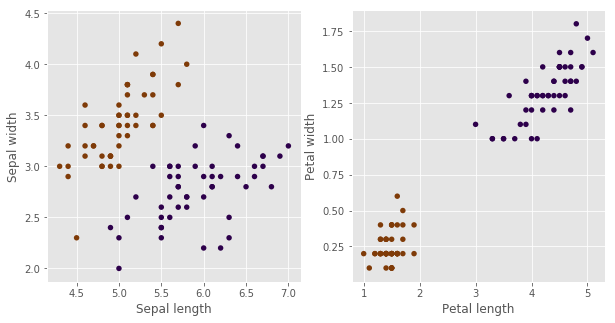

In [18]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [19]:
pred_iris = Clustering(k=2).fit_predict(x_iris)

print ("Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris))


Adjusted Rand index for iris is: 1.00


In [297]:
%timeit Clustering(k=2, tol=0.001).fit_predict(x_iris)

3.93 ms ± 203 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [298]:
from sklearn.mixture import GaussianMixture
%timeit GaussianMixture(n_components=2, tol=0.001).fit(x_iris).predict(x_iris)

2.71 ms ± 30.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [9]:
# Задание 2 инерция
def quality(x, y):
    indexes = np.argsort(y)

    x = x[indexes]
    y = y[indexes]
    a = np.array(y[:-1] - y[1:], dtype = bool)
    a = np.array(range(a.shape[0]))[a]
    k = np.bincount(y).size
    centroids = np.empty((k, x.shape[1]))
    last = 0
    for i in range(a.shape[0]):
        centroids[i] = x[0:a[i]].mean(axis=0)
        last = a[i]
    distance = np.empty(x.shape[0])
    for i in range(x.shape[0]):
        distance[i] = (((centroids - x[i])**2).sum(axis=1)**.5).min()**2
    
    """
    Implement quality criterion of your choice
    """
    return distance.sum()

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

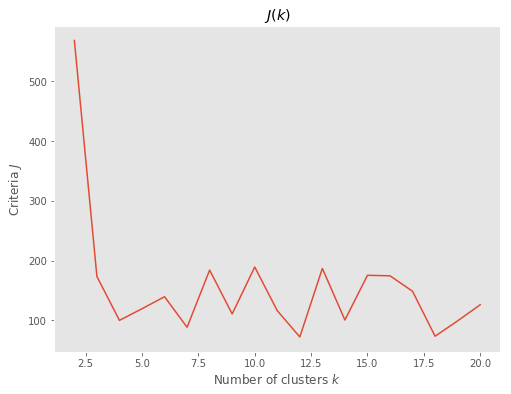

In [16]:
x = x_iris
ks = range(2, 21)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    cls = Clustering(k=k)
    y = cls.fit_predict(x)
    criteria[i] = quality(x, y)
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()


In [203]:
## Задание 3
YEAR = "2000"
df = pd.read_csv('WDIData.csv')
df.head()
df = df[['Country Name', 'Indicator Code', YEAR]]
df = df.set_index(['Country Name', 'Indicator Code'])[YEAR]
df = df.unstack()

df = (df - df.mean()) / df.std()
df = df.fillna(0)

df  = df[df.columns[(df**2).sum() > 250]]
print (df.values.shape)
df

(264, 36)


Indicator Code,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA.PC,AG.LND.FRST.K2,AG.LND.FRST.ZS,AG.LND.TOTL.K2,AG.SRF.TOTL.K2,EG.ELC.ACCS.UR.ZS,EG.ELC.ACCS.ZS,EG.ELC.RNEW.ZS,...,SM.POP.TOTL,SM.POP.TOTL.ZS,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZG,SP.RUR.TOTL.ZS,SP.URB.GROW,SP.URB.TOTL,SP.URB.TOTL.IN.ZS
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.282181,0.942984,0.572051,-0.326036,-1.304565,-0.295247,-0.296656,-0.686517,-2.166083,1.415114,...,-0.319461,-0.632044,1.519937,-0.286515,-0.265585,1.473864,1.361285,1.528943,-0.309215,-1.361285
Albania,-0.344933,0.165604,-0.163465,-0.327200,-0.168064,-0.336488,-0.336578,0.610007,0.801936,2.070548,...,-0.319418,-0.488169,-1.507254,-0.308300,-0.296406,-1.338642,0.506791,-0.767540,-0.318063,-0.506791
Algeria,-0.278294,-1.040876,0.057260,-0.325577,-1.365953,-0.181249,-0.186067,0.605661,0.770924,-0.901110,...,-0.309776,-0.603098,-0.051527,-0.272308,-0.272881,-0.750713,-0.252433,0.292991,-0.266537,0.252433
American Samoa,-0.346886,-0.692851,-0.704624,-0.328706,2.548711,-0.338282,-0.338404,0.000000,0.000000,-0.907692,...,-0.322297,2.349457,-0.077502,-0.312183,-0.300348,-1.927381,-1.449785,-0.177004,-0.321731,1.449785
Andorra,-0.346854,0.513030,-0.810744,-0.328710,0.092627,-0.338264,-0.338387,0.610007,0.801936,2.189833,...,-0.321339,3.817570,0.111483,-0.312173,-0.300352,2.727619,-1.608830,-0.476025,-0.321703,1.608830
Angola,-0.248676,0.369171,-0.180954,-0.209026,0.698541,-0.256091,-0.258671,-1.906541,-1.510279,1.047286,...,-0.321119,-0.637541,1.181675,-0.291195,-0.275933,0.795932,0.896135,1.707839,-0.306094,-0.896135
Antigua and Barbuda,-0.346878,-0.864304,-0.688073,-0.328722,-0.401814,-0.338266,-0.338389,0.610007,0.504418,-0.907692,...,-0.322399,1.405039,0.512541,-0.312150,-0.300238,1.209537,0.908331,-0.630133,-0.321802,-0.908331
Arab World,0.577932,0.061649,-0.124363,-0.232771,-1.241350,0.560037,0.543142,0.364596,0.165490,-0.769402,...,0.577950,-0.263016,0.506599,0.051355,-0.006856,0.543741,0.037863,0.254210,0.123431,-0.037863
Argentina,-0.126615,0.417377,1.941459,-0.264884,-0.886213,-0.157845,-0.160567,0.400711,0.655070,0.119428,...,-0.238048,-0.370108,-0.226467,-0.264783,-0.291516,-0.747601,-1.472965,-0.451624,-0.224036,1.472965


In [265]:
cl =Clustering(k=4, max_iter=10)
y = cl.fit_predict(df.values)
centroids = cl.centroids

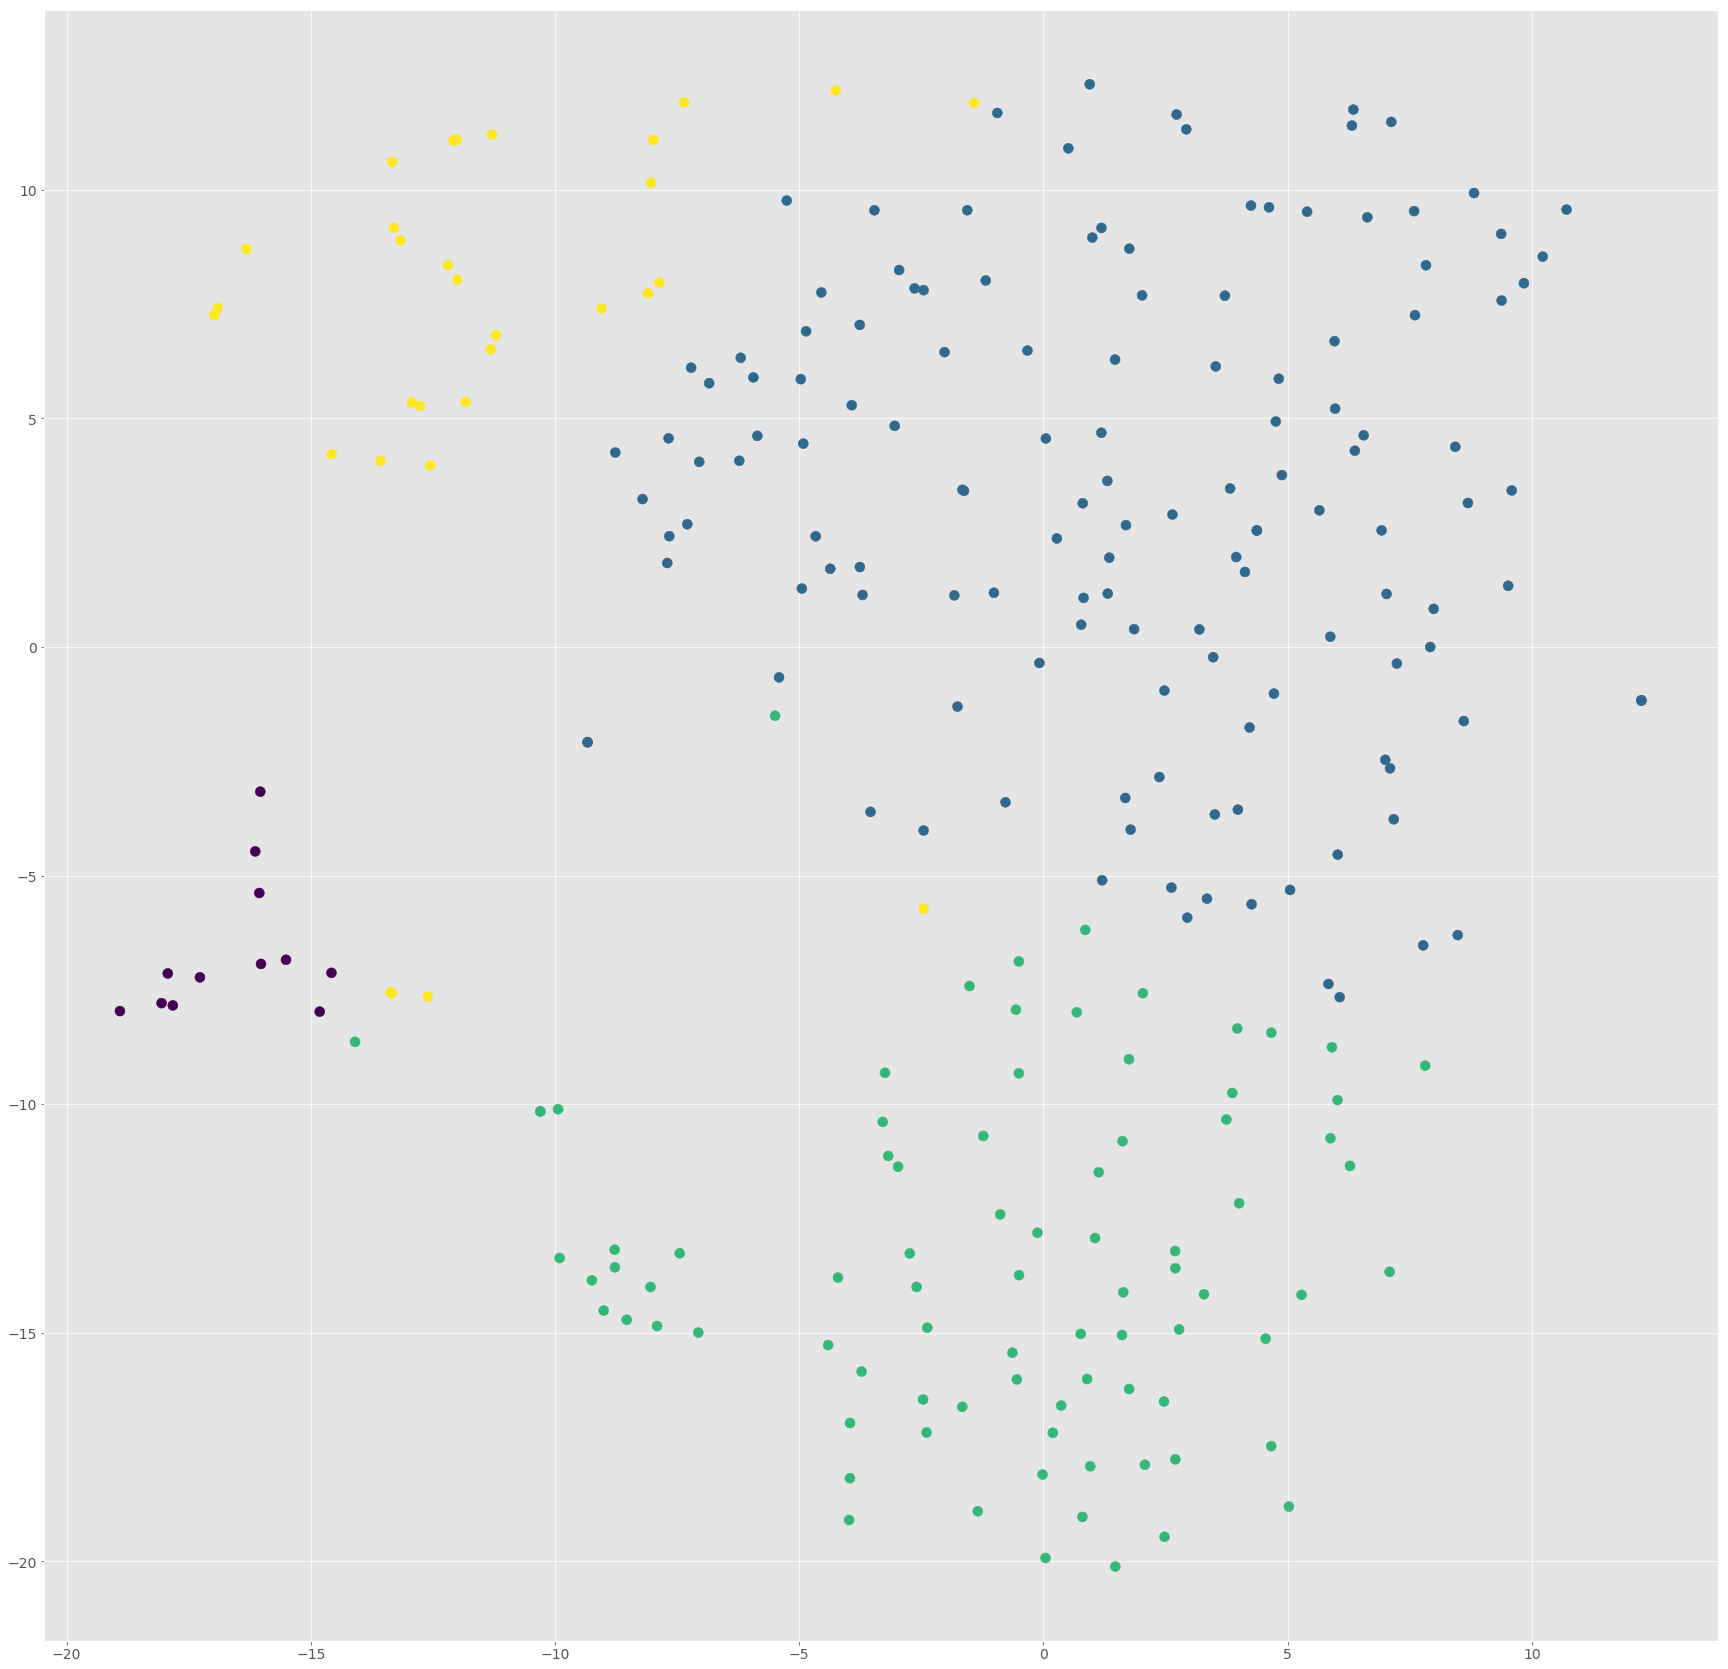

In [266]:


from sklearn.manifold import TSNE
embedded = TSNE(n_components=2).fit_transform(np.column_stack((df.values, y)))

plt.figure(figsize=(30,30))
matplotlib.rcParams.update({'font.size': 14})

plt.scatter(embedded[:,0], embedded[:,1], c=y, s=100)
plt.show()

In [299]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

def show(i):
    c = centroids
    keys = df.columns
    plt.bar(range(c.shape[1]),c[i])
    plt.xticks(range(c.shape[1]), keys, rotation = 90)
    if i == 0:
        plt.title("не страны")
    if i == 1:
        plt.title("большое население городов, много разноязычного населения. более-менее развиьы")
    if i == 2:
        plt.title("много сельского населения. Малый доступ к энергии. Бедные страны")
    if i == 3:
        plt.title("Самые богатые и развитые страны")
    plt.show()


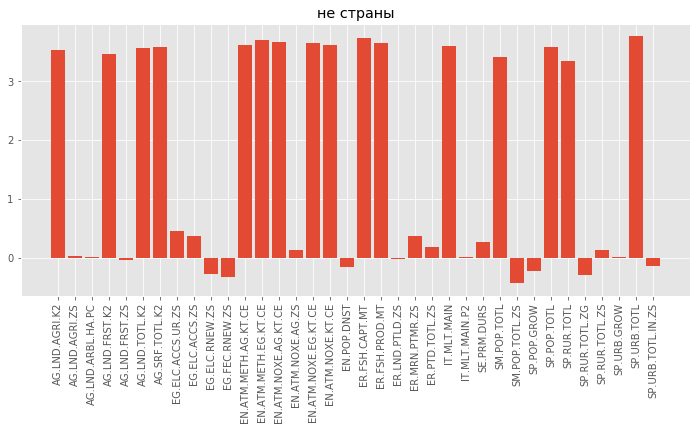

Index(['Early-demographic dividend', 'East Asia & Pacific', 'High income',
       'IBRD only', 'IDA & IBRD total', 'Late-demographic dividend',
       'Low & middle income', 'Middle income', 'OECD members',
       'Post-demographic dividend', 'Upper middle income', 'World'],
      dtype='object', name='Country Name')


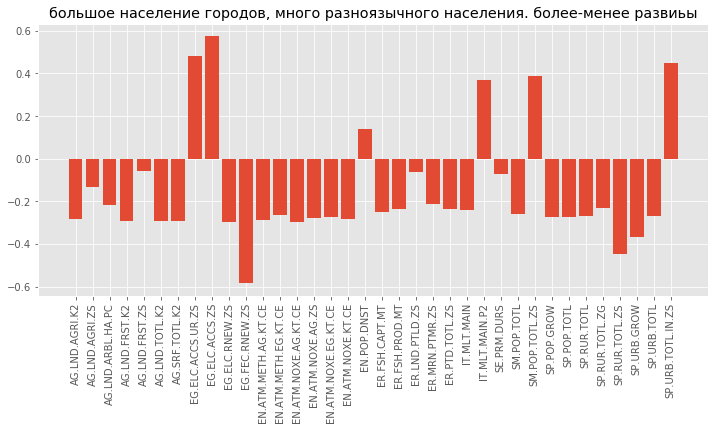

Index(['Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia', 'Aruba',
       'Austria',
       ...
       'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu',
       'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Uzbekistan',
       'Virgin Islands (U.S.)', 'West Bank and Gaza'],
      dtype='object', name='Country Name', length=136)


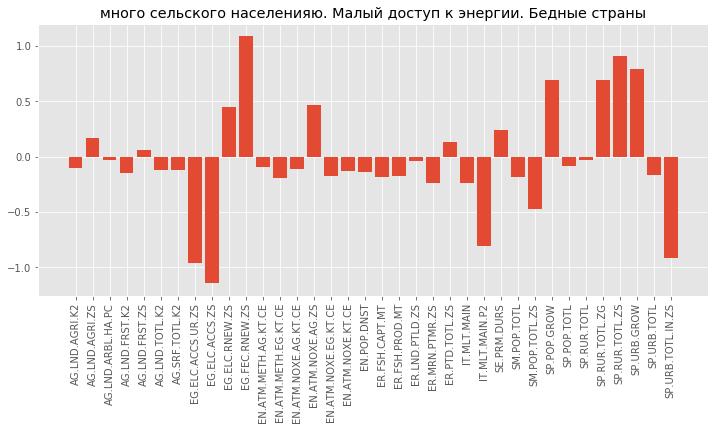

Index(['Afghanistan', 'Angola', 'Bangladesh', 'Belize', 'Benin', 'Bhutan',
       'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea', 'Eritrea',
       'Ethiopia', 'Fragile and conflict affected situations', 'Gambia, The',
       'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Heavily indebted poor countries (HIPC)', 'Honduras', 'IDA blend',
       'IDA only', 'IDA total', 'India', 'Kenya', 'Korea, Dem. People’s Rep.',
       'Lao PDR', 'Least developed countries: UN classification', 'Lesotho',
       'Liberia', 'Low income', 'Lower middle income', 'Madagascar', 'Malawi',
       'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal',
       'Nicaragua', 'Niger', 'Nigeria', 'Other small states',
       'Pacific island small states', 'Pakistan', 'Papua New Guinea',
       'Paraguay', 'Philippines', 'Pre-demographic d

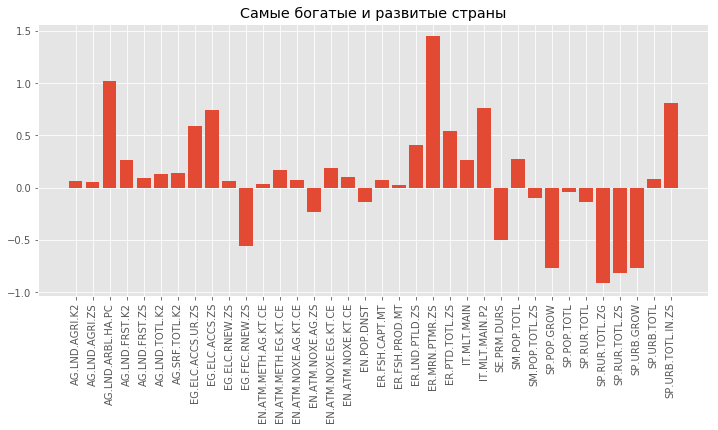

Index(['Australia', 'Belgium', 'Brazil', 'Canada', 'China', 'Curacao',
       'Denmark', 'East Asia & Pacific (IDA & IBRD countries)',
       'East Asia & Pacific (excluding high income)', 'Ecuador', 'Euro area',
       'Europe & Central Asia', 'Europe & Central Asia (IDA & IBRD countries)',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Finland', 'France', 'Germany', 'Greenland', 'Kazakhstan',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)', 'Lithuania',
       'Netherlands', 'North America', 'Norway', 'Romania',
       'Russian Federation', 'Ukraine', 'United States', 'Venezuela, RB'],
      dtype='object', name='Country Name')


In [300]:
for i in range(len(set(y))):
    show(i)
    keys = df.index
    print(keys[y==i])
    

## Задание 4
получились кластеры из 3х стран с разным уровнем развития. Нищие, средний уровень, и самые развитые страны.
И 1 класстер с не странами. видно что у самых разывитых почти все важные показатели на среднем уровне.
а самых бедных стран совсем нет доступа к энергии.

Возможно если ещё повглядываться и по подбирать разные k, То можно получить более
детальную и интересную кластеризацию стран.

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.